<a href="https://colab.research.google.com/github/nitish-reddy-2002/AlarmReminder/blob/master/mortgage_backed_securities1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:
loan=pd.read_csv("LoanExport.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
loan.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [ ]:

loan.shape
     

(291451, 28)

In [ ]:
loan.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [ ]:
loan.describe(include="object")
     

,FirstTimeHomebuyer,MSA,Occupancy,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,NumBorrowers,SellerName,ServicerName
count,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,266457,291451
unique,3,392,3,4,3,1,53,7,1767,291451,3,3,20,20
top,N,X,O,T,N,FRM,CA,SF,94500,F199Q1268030,P,2,Ot,Other servicers
freq,184154,39100,276131,167670,282125,291451,43327,244923,2582,1,123404,187335,76943,64043


In [ ]:
categorical_columns=[]
numerical_columns=[]

In [ ]:
loan.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [ ]:
for i in loan.columns:
  if loan[i].dtypes==object:
    categorical_columns.append(i)
  else:numerical_columns.append(i)

In [ ]:
categorical_columns

['FirstTimeHomebuyer',
 'MSA',
 'Occupancy',
 'Channel',
 'PPM',
 'ProductType',
 'PropertyState',
 'PropertyType',
 'PostalCode',
 'LoanSeqNum',
 'LoanPurpose',
 'NumBorrowers',
 'SellerName',
 'ServicerName']

In [ ]:
numerical_columns

['CreditScore',
 'FirstPaymentDate',
 'MaturityDate',
 'MIP',
 'Units',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'LTV',
 'OrigInterestRate',
 'OrigLoanTerm',
 'EverDelinquent',
 'MonthsDelinquent',
 'MonthsInRepayment']

In [ ]:
loan.FirstTimeHomebuyer.value_counts()

N    184154
X     78015
Y     29282
Name: FirstTimeHomebuyer, dtype: int64

In [ ]:
loan.MSA.value_counts()

X        39100
31084     9338
16974     8771
12060     6985
47644     6673
         ...  
21940        3
49500        2
25020        1
10380        1
32420        1
Name: MSA, Length: 392, dtype: int64

In [ ]:
loan.Occupancy.value_counts()

O    276131
I      8734
S      6586
Name: Occupancy, dtype: int64

In [ ]:
loan.PPM.value_counts()

N    282125
X      5405
Y      3921
Name: PPM, dtype: int64

In [ ]:
loan.ProductType.value_counts()

FRM      291451
Name: ProductType, dtype: int64

In [ ]:
loan.PropertyState.value_counts()

CA    43327
FL    19133
MI    16285
IL    13621
TX    13092
OH    11545
CO    10127
GA    10024
NC     9983
WA     9927
AZ     9248
VA     8096
NY     7913
PA     7738
NJ     7457
OR     6658
MA     6392
IN     6228
MD     5515
MO     5400
MN     5092
UT     4996
WI     4660
TN     4556
SC     4473
AL     4128
KY     3896
NV     3564
CT     3253
KS     2321
ID     2296
LA     2092
NM     2053
IA     1860
OK     1803
NE     1532
NH     1320
VT      945
AR      938
MS      935
MT      872
DE      838
ME      755
RI      722
PR      693
HI      609
WV      542
WY      496
DC      492
SD      376
ND      315
AK      245
GU       74
Name: PropertyState, dtype: int64

In [ ]:
loan.LoanSeqNum.value_counts()

F199Q1268030    1
F199Q1262485    1
F199Q1138623    1
F199Q1220622    1
F199Q1155120    1
               ..
F199Q1021744    1
F199Q1098563    1
F199Q1049090    1
F199Q1170229    1
F199Q1220923    1
Name: LoanSeqNum, Length: 291451, dtype: int64

In [ ]:
loan.LoanPurpose.value_counts()

P    123404
N    110036
C     58011
Name: LoanPurpose, dtype: int64

In [ ]:
loan.NumBorrowers.value_counts()

2     187335
1     103777
X        339
Name: NumBorrowers, dtype: int64

In [ ]:
loan.SellerName.value_counts()

Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64

In [ ]:
loan.ServicerName.value_counts()

Other servicers         64043
COUNTRYWIDE             31142
BANKOFAMERICANA         29481
WASHINGTONMUTUALBANK    22626
CHASEMANHATTANMTGECO    14791
ABNAMROMTGEGROUPINC     14369
WELLSFARGOHOMEMORTGA    13960
GMACMTGECORP            11560
BAMORTGAGELLC           11559
CHASEMTGECO             10109
NATLCITYMTGECO           9940
WELLSFARGOBANKNA         9460
JPMORGANCHASEBANKNA      7723
FTMTGESERVICESINC        7126
SUNTRUSTMORTGAGEINC      6680
CITIMORTGAGEINC          6529
PRINCIPALRESIDENTIAL     6335
CHASEHOMEFINANCELLC      5399
HOMESIDELENDINGINC       4508
FIFTHTHIRDBANK           4111
Name: ServicerName, dtype: int64

In [ ]:
loan=loan.drop(['MSA'],axis=1)
     

loan=loan.drop(['PropertyState'],axis=1)
     

loan=loan.drop(['LoanSeqNum'],axis=1)
     

loan=loan.drop(['SellerName'],axis=1)
     

loan=loan.drop(['ServicerName'],axis=1)
     

loan=loan.drop(['ProductType'],axis=1)
     

loan=loan.drop(['PostalCode'],axis=1)
     

loan=loan.drop(['MaturityDate'],axis=1)
     

loan=loan.drop(['FirstPaymentDate'],axis=1)
     

In [ ]:
loan.columns

Index(['CreditScore', 'FirstTimeHomebuyer', 'MIP', 'Units', 'Occupancy',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'Channel', 'PPM',
       'PropertyType', 'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [ ]:
print('Original Categories:')
print(loan['CreditScore'].value_counts())
print('\nModified Categories:')
loan['CreditScore'] =loan['CreditScore'].replace({0:660})
print(loan['CreditScore'].value_counts())
     

Original Categories:
748    2567
734    2537
747    2456
753    2427
764    2419
       ... 
391       1
396       1
445       1
462       1
849       1
Name: CreditScore, Length: 370, dtype: int64

Modified Categories:
748    2567
734    2537
747    2456
753    2427
764    2419
       ... 
363       1
366       1
370       1
375       1
849       1
Name: CreditScore, Length: 369, dtype: int64


In [ ]:
loan.CreditScore.describe()
bins=[300,499,600,660,700,900]
groups=['verypoor','poor','fair','good','exceptional']
loan["CreditScore_cut"] = pd.cut(loan["CreditScore"],bins=bins,labels=groups)
loan[["CreditScore_cut","CreditScore"]].head()

,CreditScore_cut,CreditScore
0,fair,660
1,fair,660
2,fair,660
3,fair,660
4,fair,660


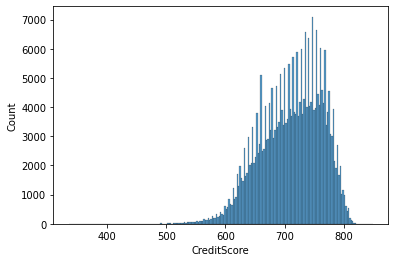

In [ ]:
sns.histplot(loan["CreditScore"])

In [ ]:
loan.head()

,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,CreditScore_cut
0,660,N,25,1,O,89,27,117000,89,6.750,T,N,SF,P,360,2,0,0,52,fair
1,660,N,0,1,O,73,17,109000,73,6.500,R,N,SF,N,360,1,0,0,144,fair
2,660,N,0,1,O,75,16,88000,75,6.875,T,N,SF,N,360,2,0,0,67,fair
3,660,N,0,1,O,76,14,160000,76,6.875,R,N,SF,N,360,2,0,0,35,fair
4,660,N,0,1,O,78,18,109000,78,7.125,R,N,SF,N,360,2,0,0,54,fair


In [ ]:
loan=loan.drop(['LTV'],axis=1)

In [ ]:

loan["MIP"].describe()

count    291451.000000
mean          9.216685
std          12.648273
min           0.000000
25%           0.000000
50%           0.000000
75%          25.000000
max          55.000000
Name: MIP, dtype: float64

In [ ]:
loan.MIP.describe()
bins=[300,499,600,660,700,900]
groups=['verypoor','poor','fair','good','exceptional']
loan["MIP_cut"] = pd.cut(loan["MIP"],bins=bins,labels=groups)
loan[["MIP_cut","MIP"]].head()

,MIP_cut,MIP
0,NaN,25
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0


In [ ]:
loan['MIP'] = loan['MIP'].fillna(0)

In [ ]:
loan['MIP'] = loan['MIP'].replace([0],10)

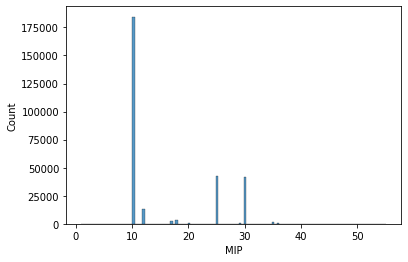

In [ ]:
sns.histplot(loan["MIP"])


In [ ]:

loan.head()

,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,CreditScore_cut,MIP_cut
0,660,N,25,1,O,89,27,117000,6.750,T,N,SF,P,360,2,0,0,52,fair,NaN
1,660,N,10,1,O,73,17,109000,6.500,R,N,SF,N,360,1,0,0,144,fair,NaN
2,660,N,10,1,O,75,16,88000,6.875,T,N,SF,N,360,2,0,0,67,fair,NaN
3,660,N,10,1,O,76,14,160000,6.875,R,N,SF,N,360,2,0,0,35,fair,NaN
4,660,N,10,1,O,78,18,109000,7.125,R,N,SF,N,360,2,0,0,54,fair,NaN


In [ ]:
loan=loan.drop(['Channel'],axis=1)

In [ ]:

loan["OrigUPB"].describe()

count    291451.000000
mean     124940.387921
std       53657.440624
min        8000.000000
25%       83000.000000
50%      117000.000000
75%      160000.000000
max      497000.000000
Name: OrigUPB, dtype: float64

In [ ]:
print('Original Categories:')
print(loan['OrigUPB'].value_counts())
print('\nModified Categories:')
loan['OrigUPB'] =loan['OrigUPB'].replace({0:117000})
print(loan['OrigUPB'].value_counts())
     

Original Categories:
240000    7035
100000    5474
80000     3707
90000     3555
120000    3549
          ... 
9000         1
353000       1
497000       1
442000       1
420000       1
Name: OrigUPB, Length: 375, dtype: int64

Modified Categories:
240000    7035
100000    5474
80000     3707
90000     3555
120000    3549
          ... 
9000         1
353000       1
497000       1
442000       1
420000       1
Name: OrigUPB, Length: 375, dtype: int64


In [ ]:
loan.CreditScore.describe()
bins=[300,499,600,660,700,900]
groups=['verypoor','poor','fair','good','exceptional']
loan["CreditScore_cut"] = pd.cut(loan["CreditScore"],bins=bins,labels=groups)
loan[["CreditScore_cut","CreditScore"]].head()
     

,CreditScore_cut,CreditScore
0,fair,660
1,fair,660
2,fair,660
3,fair,660
4,fair,660


In [ ]:
loan.describe()
     

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,711.629519,15.547457,1.026022,76.960529,30.033453,124940.387921,6.926547,359.835375,0.197848,1.837729,60.805291
std,51.302135,8.155370,0.202986,15.236154,13.203974,53657.440624,0.343541,2.286939,0.398378,8.809392,46.142599
min,335.000000,1.000000,0.000000,0.000000,0.000000,8000.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,10.000000,1.000000,70.000000,22.000000,83000.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,10.000000,1.000000,80.000000,31.000000,117000.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,12.350000,361.000000,1.000000,180.000000,212.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


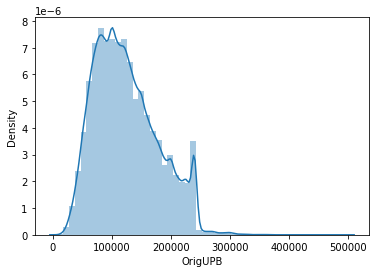

In [ ]:
sns.distplot(loan["OrigUPB"])
     

In [ ]:

loan.DTI.describe()
bins=[0,10,15,20,30]
groups=['lowrisk','mediumrisk','highrisk','dangerous']
loan["DTI_cut"] = pd.cut(loan["DTI"],bins=bins,labels=groups)
loan[["DTI_cut","MIP"]].head()

,DTI_cut,MIP
0,dangerous,25
1,highrisk,10
2,highrisk,10
3,mediumrisk,10
4,highrisk,10


In [ ]:
loan.OCLTV.describe()
bins=[0,79,100]
groups=['approved','may be approved']
loan["OCLTV_cut"] = pd.cut(loan["OCLTV"],bins=bins,labels=groups)
loan[["OCLTV_cut","MIP"]].head()

,OCLTV_cut,MIP
0,may be approved,25
1,approved,10
2,approved,10
3,approved,10
4,approved,10


In [ ]:
loan["CreditScore_cut"]=loan["CreditScore_cut"].astype("str")
loan["OCLTV_cut"]=loan["OCLTV_cut"].astype("str")
loan["DTI_cut"]=loan["DTI_cut"].astype("str")
     

loan=loan.drop(["DTI","OCLTV","CreditScore"],axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


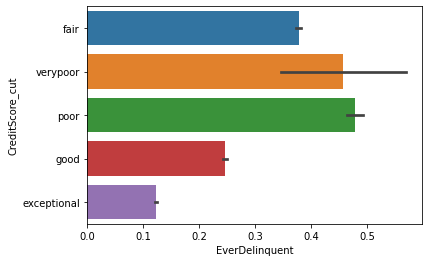

In [ ]:
sns.barplot(loan["EverDelinquent"],loan["CreditScore_cut"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


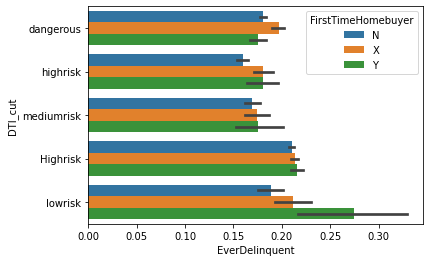

In [ ]:
loan["DTI_cut"]=loan["DTI_cut"].replace({"nan":"Highrisk"})
     

sns.barplot(loan["EverDelinquent"],loan["DTI_cut"],hue=loan["FirstTimeHomebuyer"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


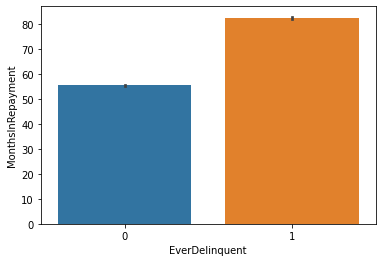

In [ ]:
sns.barplot(loan["EverDelinquent"],loan["MonthsInRepayment"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


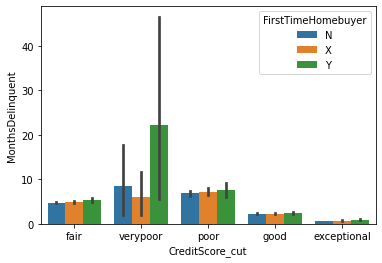

In [ ]:
sns.barplot(loan["CreditScore_cut"],loan["MonthsDelinquent"],hue=loan["FirstTimeHomebuyer"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


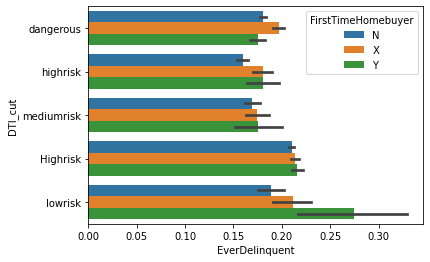

In [ ]:
loan["DTI_cut"]=loan["DTI_cut"].replace({"nan":"Highrisk"})
     

sns.barplot(loan["EverDelinquent"],loan["DTI_cut"],hue=loan["FirstTimeHomebuyer"])

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  LOWER_RANGE=Q1-(1.5*IQR)
  UPPER_RANGE=Q3+(1.5*IQR)
  return LOWER_RANGE,UPPER_RANGE

In [ ]:
LOWERITEMVISIBILITY,UPPERITEMVISIBILITY = remove_outlier(loan["MIP"])
loan["MIP"] = np.where(loan["MIP"]>UPPERITEMVISIBILITY,UPPERITEMVISIBILITY,loan["MIP"])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


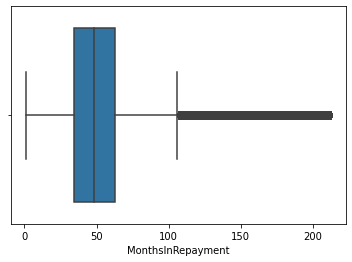

In [ ]:
sns.boxplot(loan["MonthsInRepayment"])
     

In [ ]:
LOWERITEMVISIBILITY,UPPERITEMVISIBILITY = remove_outlier(loan["MonthsInRepayment"])
loan["MonthsInRepayment"] = np.where(loan["MonthsInRepayment"]>UPPERITEMVISIBILITY,UPPERITEMVISIBILITY,loan["MonthsInRepayment"])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


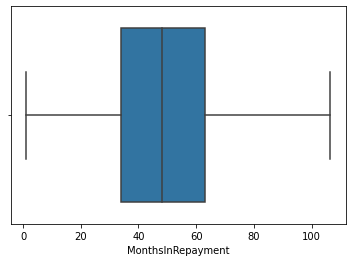

In [ ]:
sns.boxplot(loan["MonthsInRepayment"])

In [ ]:
LOWERITEMVISIBILITY,UPPERITEMVISIBILITY = remove_outlier(loan["OrigUPB"])
loan["OrigUPB"] = np.where(loan["OrigUPB"]>UPPERITEMVISIBILITY,UPPERITEMVISIBILITY,loan["OrigUPB"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


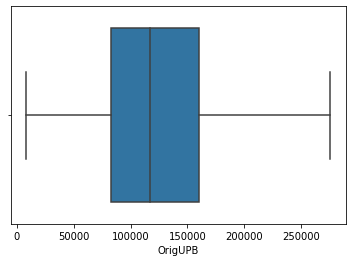

In [ ]:
sns.boxplot(loan["OrigUPB"])

In [ ]:
loan.isnull().sum()

FirstTimeHomebuyer         0
MIP                        0
Units                      0
Occupancy                  0
OrigUPB                    0
OrigInterestRate           0
PPM                        0
PropertyType               0
LoanPurpose                0
OrigLoanTerm               0
NumBorrowers               0
EverDelinquent             0
MonthsDelinquent           0
MonthsInRepayment          0
CreditScore_cut            0
MIP_cut               291451
DTI_cut                    0
OCLTV_cut                  0
dtype: int64

In [ ]:

loan.count()

FirstTimeHomebuyer    291451
MIP                   291451
Units                 291451
Occupancy             291451
OrigUPB               291451
OrigInterestRate      291451
PPM                   291451
PropertyType          291451
LoanPurpose           291451
OrigLoanTerm          291451
NumBorrowers          291451
EverDelinquent        291451
MonthsDelinquent      291451
MonthsInRepayment     291451
CreditScore_cut       291451
MIP_cut                    0
DTI_cut               291451
OCLTV_cut             291451
dtype: int64

In [ ]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ['CreditScore_cut','OCLTV_cut','NumBorrowers','DTI_cut','LoanPurpose','PPM','Occupancy','FirstTimeHomebuyer']
le = LabelEncoder()
for i in var_mod:
    loan[i] = le.fit_transform(loan[i])
     

In [ ]:
loan = pd.get_dummies(loan, columns=['CreditScore_cut','OCLTV_cut','NumBorrowers','DTI_cut','LoanPurpose','PPM','Occupancy','FirstTimeHomebuyer'])
     

In [ ]:
#Normalizing and Scaling( Numerical Variables)
from sklearn.preprocessing import StandardScaler


In [ ]:
std_scale=StandardScaler()
std_scale
     

StandardScaler()

In [ ]:
loan["Units"]=std_scale.fit_transform(loan[["Units"]])
     

loan["MIP"]=std_scale.fit_transform(loan[["MIP"]])
loan["OrigUPB"]=std_scale.fit_transform(loan[["OrigUPB"]])
loan["OrigInterestRate"]=std_scale.fit_transform(loan[["OrigInterestRate"]])
loan["OrigLoanTerm"]=std_scale.fit_transform(loan[["OrigLoanTerm"]])
loan["EverDelinquent"]=std_scale.fit_transform(loan[["EverDelinquent"]])
loan["MonthsDelinquent"]=std_scale.fit_transform(loan[["MonthsDelinquent"]])
loan["MonthsInRepayment"]=std_scale.fit_transform(loan[["MonthsInRepayment"]])
     

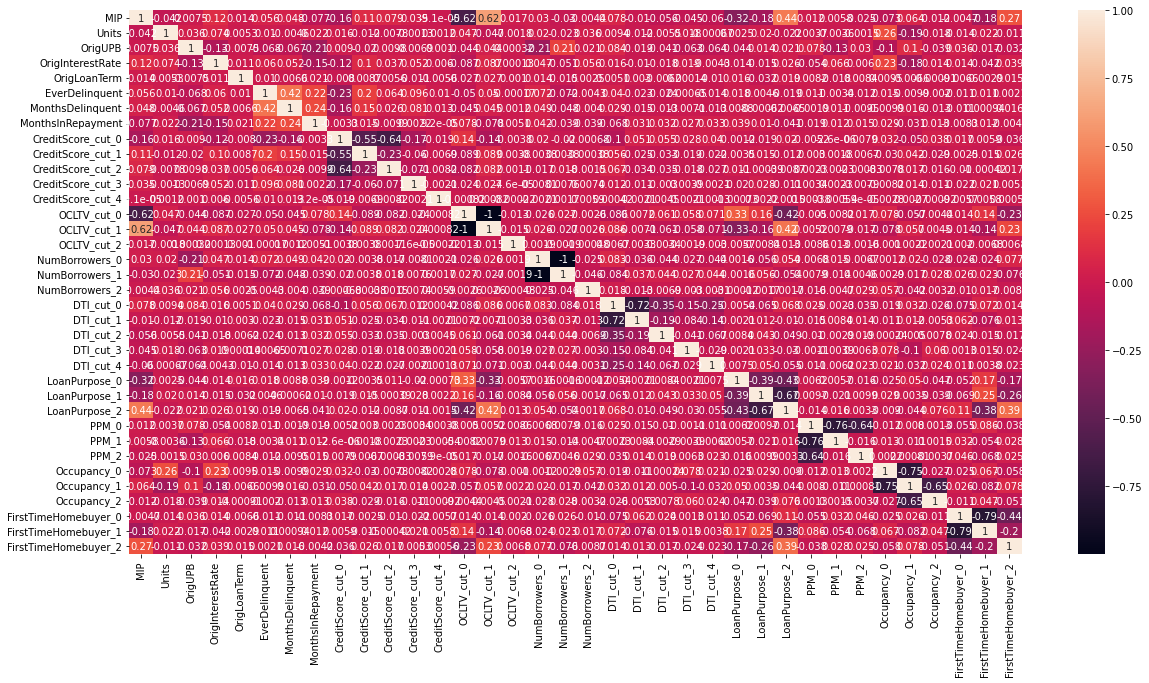

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(loan.corr(),annot=True)
     